In [46]:
"""Classifying News Headlines
The purpose of this project is to correctly classify news headlines by training models on the News Aggregator Dataset found in the UCI ML Repository: http://archive.ics.uci.edu/ml/datasets/News+Aggregator.

I will also include a function that allows the input of custom headlines (fake or real) and returns the suitable category.
"""

'Classifying News Headlines\nThe purpose of this project is to correctly classify news headlines by training models on the News Aggregator Dataset found in the UCI ML Repository: http://archive.ics.uci.edu/ml/datasets/News+Aggregator.\n\nI will also include a function that allows the input of custom headlines (fake or real) and returns the suitable category.\n'

In [47]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn_evaluation.plot import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
news = pd.read_csv('C://Users//Ruhan Siddiqui//Downloads//news-aggregator-dataset//uci-news-aggregator.csv')
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [50]:
news['CATEGORY'].unique() # unique category labels


array(['b', 't', 'e', 'm'], dtype=object)

(-1.101639420124838,
 1.1000780787490432,
 -1.1090927453255768,
 1.1174362845275305)

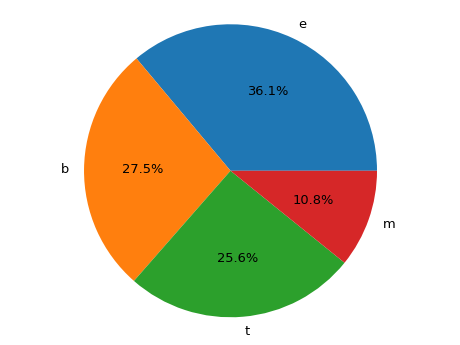

In [52]:
news.CATEGORY.value_counts().plot(kind='pie', 
                                  figsize=(8,6), 
                                  fontsize=13, 
                                  autopct='%1.1f%%', 
                                  wedgeprops={'linewidth': 5}
                                  )
plt.axis('off')
plt.axis('equal')



In [54]:
news['TITLE'] = news['TITLE'].str.replace('[^\w\s]','').str.lower() # unpunctuate and lower case


In [58]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(news['TITLE'])#learn vocabulary  dictionary and retrun document term matrix

y = news['CATEGORY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 30% split

# fit and score the bayesian classifier
mnb = MultinomialNB(alpha=1)
mnb.fit(X_train, y_train)
mnb.score(X_test, y_test)


0.9274418824866247

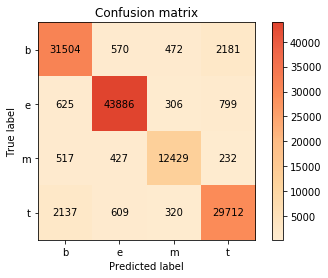

In [60]:
confusion_matrix(y_test, mnb.predict(X_test), target_names = ['b','e','m','t']).grid(False)


In [62]:
sgd = SGDClassifier(n_jobs=-1, max_iter=10, random_state=1234)
#sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

# hyperparameters for tuning
sgd_grid = [{'loss': ['hinge', 'log', 'squared_hinge'],
             'alpha': [0.0001, 0.0001, 0.00001]}]

# grid search with cross validation
sgd_search = GridSearchCV(estimator=sgd, param_grid=sgd_grid, cv=5, refit=True)
sgd_search.fit(X_train, y_train)

C:\Users\Ruhan Siddiqui\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=10,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=1234, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.0001, 1e-05],
                          'loss': ['hinge', 'log', 'squared_hinge']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
      

In [63]:
sgd_search.best_params_

{'alpha': 1e-05, 'loss': 'hinge'}

In [64]:
sgd_search.best_estimator_.score(X_test, y_test)


0.9472562852137683

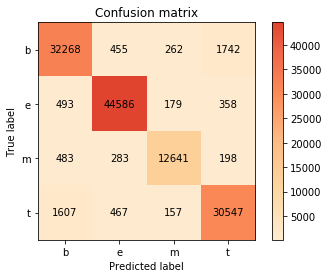

In [65]:
confusion_matrix(y_test, sgd_search.best_estimator_.predict(X_test), target_names = ['b','e','m','t']).grid(False)

In [66]:
# sample predictions using our sgd classifier on 2017 BBC headlines
print('news title', '                                 ', 'category', '\n' 
      'Bank of England staff to go on strike', '      ', title_to_category('Bank of England staff to go on strike'), '\n'
      'Trump stance could damage Earth - Hawking', '  ', title_to_category('Trump stance could damage Earth - Hawking'), '\n'
      'Olivia de Havilland sues over TV show', '      ', title_to_category('Olivia de Havilland sues over TV show')
     )


news title                                   category 
Bank of England staff to go on strike        business 
Trump stance could damage Earth - Hawking    science and technology 
Olivia de Havilland sues over TV show        entertainment


In [67]:
# testing a headline from The Onion
title_to_category("Johnson & Johnson introduces 'nothing but tears shampoo' to 'toughen up' infants.")
# link to article: http://www.theonion.com/article/johnson-johnson-introduces-nothing-but-tears-shamp-2506

'health'

In [68]:
# another one from The Onion
title_to_category("Archaeological Dig Uncovers Ancient Race Of Skeleton People.")
# link to article: http://www.theonion.com/article/archaeological-dig-uncovers-ancient-race-of-skelet-932
# quote from article: "And though we know little of their language and means of communication, it is likely that they said 'boogedy-boogedy' a lot."


'science and technology'

In [69]:
title_to_category("Watch free live streaming of 'iTunes Festival' SXSW.")

'entertainment'

In [ ]:
#Acknowledgments
#Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.